#**Classificação de objetos CIFAR-10**

##**Definição do problema**

<div align="justify"><p>Pretende-se desenvolver um classificador para diferentes objetos. Para isso, utilizaremos a base de dados CIFAR-10, que consiste em 60000 imagens coloridas com as dimensões 32x32 divididas em 10 classe. As classes dessa base de dados são: Avião, Carro, Barco, Cachorro, Caminhão, Cavalo, Gato, Passáros, Sapo e Veados.</p>

<p>Essa base de dados é muito utilizada para treinamento de modelos para aplicações de visão computacional. Tendo em vista isso, utilizaremos as técnicas de classificação de imagens com Deep Learning para construímos nosso classificado.</p>

Fonte da base de dados: https://www.cs.toronto.edu/~kriz/cifar.html


##**Resolução**

###**Etapa 1 - Importação das bibliotecas**

In [1]:
# Verificação da versão do TensorFlow e importação das bibliotecas necessárias
%tensorflow_version 2.x
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar valores aleatórios
import random
tf.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.3.0'

###**Etapa 2 - Carregamento da base de dados**

In [2]:
# Carregamento da base de dados e a divisão em treinamento e teste
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
# Verificar o formato de X_train
X_train.shape

(50000, 32, 32, 3)

Temos 50000 imagens com as dimensões 32x32 e 3 canais (coloridas) para treinamento do modelo.

In [4]:
# Verificar o formato de X_test
X_test.shape

(10000, 32, 32, 3)

Temos 10000 imagens com as dimensões 32x32 e 3 canais (coloridas) para teste do modelo.

In [5]:
# Verificar o formato de y_train
y_train.shape

(50000, 1)

In [6]:
# verificar o formato de y_test
y_test.shape

(10000, 1)

###**Etapa 3 - Visualização dos dados**

[5]


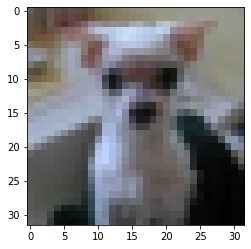

In [7]:
# Visualização de uma imagem da base de dados

# Atribuimos um valor aleatório a variável i
i = random.randint(1, 60000)
# Exibe a imagem da posição i  na base de dados
plt.imshow(X_train[i])
# Exibe a classe da imagem
print(y_train[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


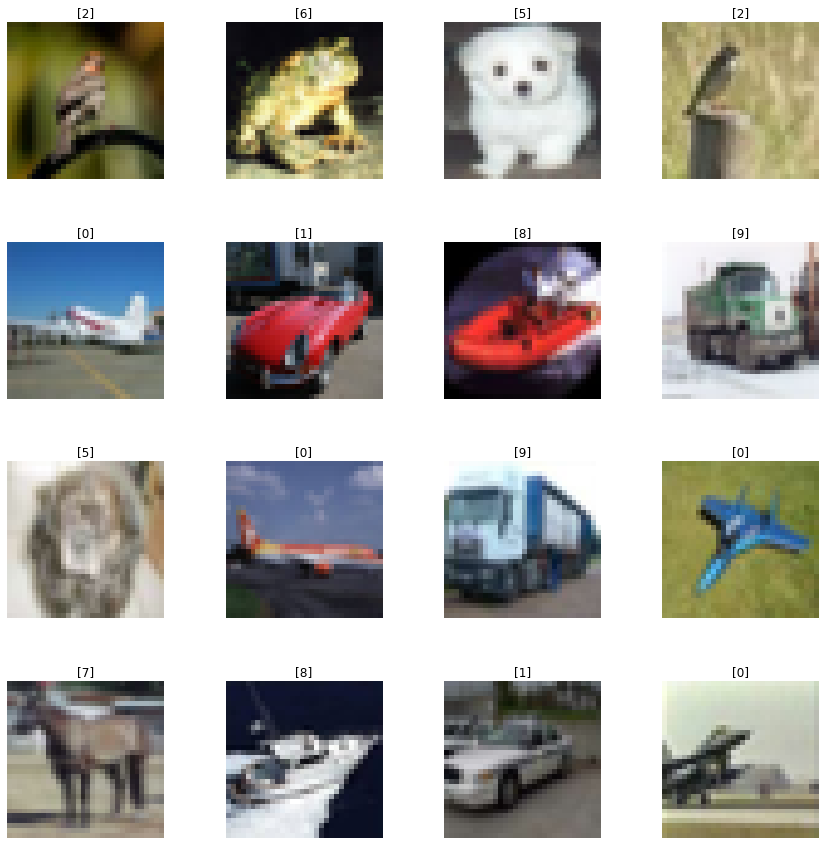

In [8]:
# Definir dimensões para exibir as imagens em grid
W_grid = 4
L_grid = 4

# Criação dos subplots para exibir imagens com dimensão 15x15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))

# Transformação do formato de matriz para vetor
axes = axes.ravel()

# Indicar o tamanho da base de dados de treinamento
n_training = len(X_train)

# Criação de variáveis espaçadas
for i in np.arange(0, L_grid * W_grid):

    # Sortear um número aleatório
    index = np.random.randint(0, n_training)

    # Mostrar imagem dentro do eixo
    axes[i].imshow(X_train[index])

    # Definir classe como título da imagem exibida
    axes[i].set_title(y_train[index])

     # Retirar informações dos eixos, mostrar somente as imagens
    axes[i].axis('off')

# Definir espaçamento horizontal     
plt.subplots_adjust(hspace = 0.4);

###**Etapa 4 - Preparação dos dados**

In [9]:
# Visualizar X_train
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
# Conversão dos valores da base de dados de treinamento e teste para float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
# Visualizar y_train (formato esparso)
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
# Necessitamos transformar as classes de y_train em variáveis categóricas (formato OneHotEncoder)
# Criação da variável number_cat e atribuímos o valor 10
number_cat = 10

In [13]:
# Transformação dos valores das classes de treinamento para variáveis categóricas
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [14]:
# Visualizar y_train
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
# Visualizar um registro de y_train para verificação da transformação
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
# Transformação dos valores das classes de teste para variáveis categóricas
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [17]:
# Visualizar y_test
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
# Normalização dos dados de treinamentos e teste
X_train = X_train/255
X_test = X_test/255

In [19]:
# Visualizar X_train
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [20]:
# Visualizar o formato de X_train
X_train.shape

(50000, 32, 32, 3)

In [21]:
# Atribuir a variável input_shape os valores do formato de X_train
input_shape = X_train.shape[1:]

In [22]:
# Visualizar input_shape, esse será os valores de entrada da nossa rede neural artificial
input_shape

(32, 32, 3)

In [23]:
# Visualizar o formato y_train
y_train.shape

(50000, 10)

###**Etapa 5 - Construção e treinamento do modelo**

In [24]:
# Definir um modelo sequencial de camadas
cnn = tf.keras.Sequential()

# Criação de uma Rede Neural Convolucional

# Primeira camada de convolucional
# 32 filtros de tamanho 3x3 (feature detector)
# Função de ativação RELU
# Valor de entrada (32, 32, 3)
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))

# Segunda camada de convolucional
# 32 filtros de tamanho 3x3 (feature detector)
# Função de ativação RELU
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))

# Camada de MaxPoolling com stride 2x2
cnn.add(tf.keras.layers.MaxPooling2D(2,2))

# Para evitar overfitting, aplicamos Dropout para zerarmos uma parte dos neurônios
# Aplicação de Dropout em 30% dos neurônios
cnn.add(tf.keras.layers.Dropout(0.3))

# Terceira camada de convolucional
# 32 filtros de tamanho 3x3 (feature detector)
# Função de ativação RELU
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))

# Quarta camada de convolucional
# 32 filtros de tamanho 3x3 (feature detector)
# Função de ativação RELU
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))

# Camada de MaxPoolling com stride 2x2
cnn.add(tf.keras.layers.MaxPooling2D(2,2))

# Aplicação de Dropout em 30% dos neurônios
cnn.add(tf.keras.layers.Dropout(0.3))

# Camada de Flattening (Transformação de uma matriz em um vetor)
cnn.add(tf.keras.layers.Flatten())

# Criação da Rede Neural Densa
# Adicionar 1064 neurônios
# Função de ativação RELU
cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

# Aplicação de Dropout em 30% dos neurônios
cnn.add(tf.keras.layers.Dropout(0.3))

# Adicionar 1064 neurônios
# Função de ativação RELU
cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

# Adicionar 10 neurônios para saída
# Função de ativação Softmax
cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Visualizar sumário da rede neural criada
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [25]:
# Compilação do modelo

# Algoritmo de otimização 'RMSprop' com taxa de aprendizado de 0.0001 
# Decay de 1e-6 (valor para diminuição do valor da taxa de aprendizado com decorrer das épocas)
# Função de custo 'categorical_crossentropy'
# Acurácia como métrica da avaliação do treinamento
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), # 0.0000006
            loss ='categorical_crossentropy', metrics =['accuracy'])

In [26]:
# Definir 150 épocas para treinamento
epochs = 100

# Treinamento do modelo

# Armazenar os resultados do treinamento na variável history
# Definir batch size em 512 (intervalo para o ajuste dos pesos).
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/100
98/98 [==============================] - 3s 29ms/step - loss: 2.0912 - accuracy: 0.2256
Epoch 2/100
98/98 [==============================] - 3s 27ms/step - loss: 1.8753 - accuracy: 0.3215
Epoch 3/100
98/98 [==============================] - 3s 28ms/step - loss: 1.7508 - accuracy: 0.3673
Epoch 4/100
98/98 [==============================] - 3s 28ms/step - loss: 1.6775 - accuracy: 0.3946
Epoch 5/100
98/98 [==============================] - 3s 28ms/step - loss: 1.6192 - accuracy: 0.4131
Epoch 6/100
98/98 [==============================] - 3s 28ms/step - loss: 1.5701 - accuracy: 0.4326
Epoch 7/100
98/98 [==============================] - 3s 28ms/step - loss: 1.5223 - accuracy: 0.4527
Epoch 8/100
98/98 [==============================] - 3s 28ms/step - loss: 1.4886 - accuracy: 0.4607
Epoch 9/100
98/98 [==============================] - 3s 28ms/step - loss: 1.4559 - accuracy: 0.4767
Epoch 10/100
98/98 [==============================] - 3s 28ms/step - loss: 1.4209 - accuracy: 0.4854

###**Etapa 6 - Avaliação do modelo**

In [27]:
# Executar avaliação das previsões da RNA para os dados de teste (X_test e y_test). Para isso, utilizamos a função evaluate
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.6962 - accuracy: 0.7636
Test Accuracy: 0.7635999917984009


* **Valor de erro: 0.69** 
* **Acurácia: 0.76** 

In [29]:
# Executar as previsões das classes para a base de dados de teste
predicted_classes = cnn.predict_classes(X_test) 
predicted_classes

array([3, 8, 8, ..., 5, 1, 7])

In [30]:
# Visualizar posição 1 de y_test
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [31]:
# Buscar índice com maior valor para ajuste dos valores de y_test
y_test = y_test.argmax(1)

In [32]:
# Visualizar y_test
y_test

array([3, 8, 8, ..., 5, 1, 7])

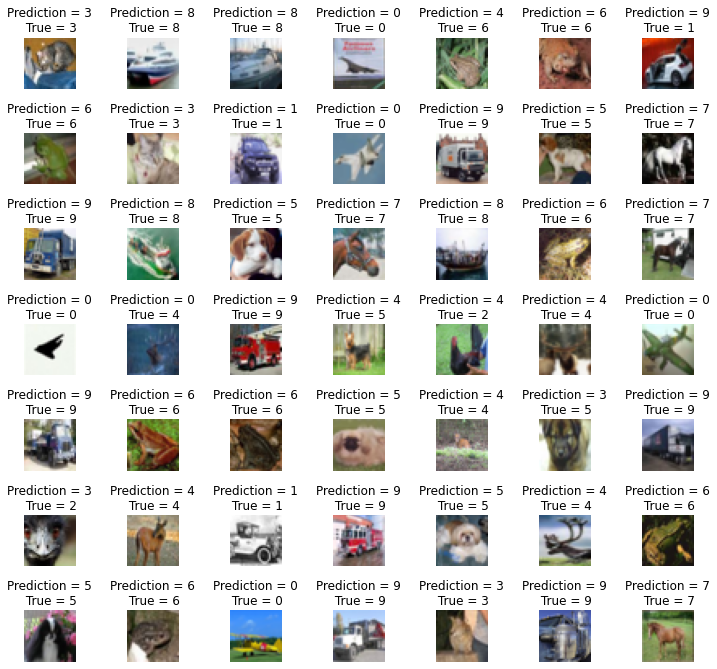

In [33]:
# Visualização de 49 imagens previstas pelo modelo para fins de comparação entre a classe real e a classe prevista
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

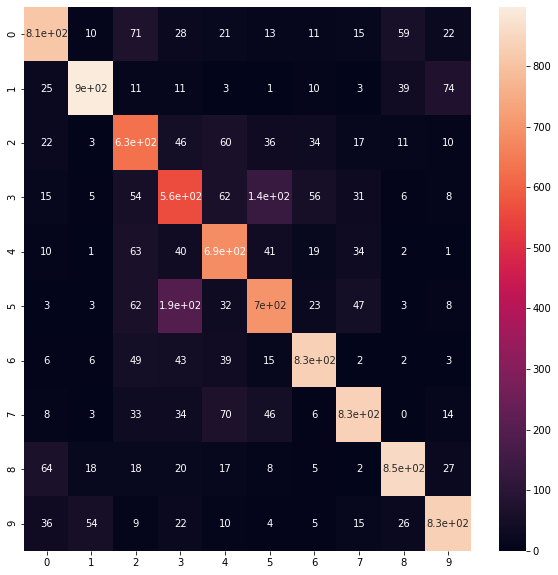

In [35]:
# Importação da matriz de confusão e seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Visualizar a matriz de confusão através de um Heatmap
cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True);

In [36]:
# Visualizar matriz de confusão
cm

array([[811,  10,  71,  28,  21,  13,  11,  15,  59,  22],
       [ 25, 897,  11,  11,   3,   1,  10,   3,  39,  74],
       [ 22,   3, 630,  46,  60,  36,  34,  17,  11,  10],
       [ 15,   5,  54, 562,  62, 136,  56,  31,   6,   8],
       [ 10,   1,  63,  40, 686,  41,  19,  34,   2,   1],
       [  3,   3,  62, 194,  32, 700,  23,  47,   3,   8],
       [  6,   6,  49,  43,  39,  15, 831,   2,   2,   3],
       [  8,   3,  33,  34,  70,  46,   6, 834,   0,  14],
       [ 64,  18,  18,  20,  17,   8,   5,   2, 852,  27],
       [ 36,  54,   9,  22,  10,   4,   5,  15,  26, 833]])